In [0]:
import cv2
import numpy as np
from scipy.stats import itemfreq
import matplotlib.pyplot as plt


In [0]:

def get_dominant_color(image, n_colors):
    pixels = np.float32(image).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    flags, labels, centroids = cv2.kmeans(
        pixels, n_colors, None, criteria, 10, flags)
    palette = np.uint8(centroids)
    return palette[np.argmax(itemfreq(labels)[:, -1])]




In [0]:


def detect_sign (frame):
    
    title=""
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    img = cv2.medianBlur(gray, 37)
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT,
                              1, 50, param1=120, param2=40)

    if not circles is None:
        circles = np.uint16(np.around(circles))
        max_r, max_i = 0, 0
        for i in range(len(circles[:, :, 2][0])):
            if circles[:, :, 2][0][i] > 50 and circles[:, :, 2][0][i] > max_r:
                max_i = i
                max_r = circles[:, :, 2][0][i]
        x, y, r = circles[:, :, :][0][max_i]
        if y > r and x > r:
            square = frame[y-r:y+r, x-r:x+r]

            dominant_color = get_dominant_color(square, 2)
            if dominant_color[2] > 100:
                print("STOP")
            elif dominant_color[0] > 80:
                zone_0 = square[square.shape[0]*3//8:square.shape[0]
                                * 5//8, square.shape[1]*1//8:square.shape[1]*3//8]
                
                zone_0_color = get_dominant_color(zone_0, 1)

                zone_1 = square[square.shape[0]*1//8:square.shape[0]
                                * 3//8, square.shape[1]*3//8:square.shape[1]*5//8]
                
                zone_1_color = get_dominant_color(zone_1, 1)

                zone_2 = square[square.shape[0]*3//8:square.shape[0]
                                * 5//8, square.shape[1]*5//8:square.shape[1]*7//8]
             
                zone_2_color = get_dominant_color(zone_2, 1)

                if zone_1_color[2] < 60:
                    if sum(zone_0_color) > sum(zone_2_color):
                        title =  "LEFT"
                    else:
                        title = "RIGHT"
                else:
                    if sum(zone_1_color) > sum(zone_0_color) and sum(zone_1_color) > sum(zone_2_color):
                        title="FORWARD"
                    elif sum(zone_0_color) > sum(zone_2_color):
                        title = "FORWARD AND LEFT"
                    else:
                        title= "FORWARD AND RIGHT"
            else:
                print("N/A")

        for i in circles[0, :]:
            cv2.circle(frame, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(frame, (i[0], i[1]), 2, (0, 0, 255), 3)
    plt.imshow(frame)
    plt.title(title)
    plt.show()




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if __name__ == '__main__':


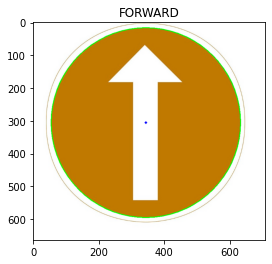

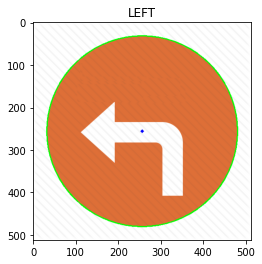

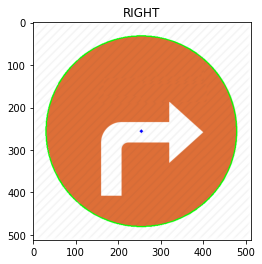

STOP


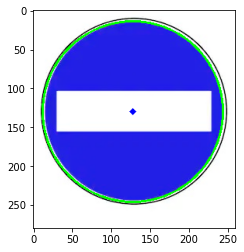

In [10]:
img1 = cv2.imread("/test1.jpg")
img2 = cv2.imread("/test2.png")
img3 = cv2.imread("/test3.png")
img4 = cv2.imread("/test4.jpg")

detect_sign(img1)
detect_sign(img2)
detect_sign(img3)
detect_sign(img4)
cv2.waitKey(0)